In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df = pd.read_csv('../data/cleaned/truck_delay_cleaned.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11005 entries, 0 to 11004
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   distance              11005 non-null  float64
 1   average_hours         11005 non-null  float64
 2   truck_age             11005 non-null  int64  
 3   load_capacity_pounds  11005 non-null  float64
 4   mileage_mpg           11005 non-null  int64  
 5   fuel_type             11005 non-null  object 
 6   temp_x                11005 non-null  float64
 7   wind_speed_x          11005 non-null  float64
 8   humidity_x            11005 non-null  float64
 9   visibility_x          11005 non-null  float64
 10  pressure_x            11005 non-null  float64
 11  no_of_vehicles        11005 non-null  float64
 12  accident              11005 non-null  int64  
 13  gender                11005 non-null  object 
 14  age                   11005 non-null  int64  
 15  experience         

In [5]:
df

,distance,average_hours,truck_age,load_capacity_pounds,mileage_mpg,fuel_type,temp_x,wind_speed_x,humidity_x,visibility_x,...,wind_speed_y,humidity_y,visibility_y,pressure_y,delay,efficiency,fuel_efficiency,weather_impact,visibility_speed,age_experience_ratio
0,310.75,6.22,9,3000.00,23,diesel,31.00,4.25,86.00,6.00,...,10.50,80.62,5.25,1027.42,0,49.96,13.51,903.00,344.16,5.33
1,1050.84,21.02,7,15000.00,21,diesel,43.25,9.25,78.50,6.00,...,10.50,80.62,5.25,1027.42,0,49.99,50.04,824.25,342.24,3.92
2,38.10,0.76,10,3000.00,26,diesel,24.00,7.00,63.75,5.50,...,10.50,80.62,5.25,1027.42,0,50.13,1.47,669.38,352.60,7.17
3,688.91,13.78,12,8501.88,27,diesel,38.50,4.50,85.50,6.00,...,10.50,80.62,5.25,1027.42,0,49.99,25.52,897.75,296.82,3.06
4,433.01,8.66,8,6000.00,22,diesel,35.50,4.50,84.75,3.50,...,10.50,80.62,5.25,1027.42,0,50.00,19.68,889.88,137.45,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11000,9183.35,183.67,10,4000.00,28,diesel,55.00,6.50,97.25,4.75,...,9.96,56.46,6.00,1013.54,0,50.00,327.98,968.45,189.48,5.27
11001,8994.17,179.88,11,3000.00,21,diesel,41.75,4.75,82.50,5.00,...,9.96,56.46,6.00,1013.54,1,50.00,428.29,821.56,319.40,2.94
11002,9651.62,193.03,10,15000.00,18,gas,52.50,2.75,91.00,3.50,...,9.96,56.46,6.00,1013.54,1,50.00,536.20,906.21,210.49,2.67
11003,8611.88,172.24,12,3000.00,22,diesel,41.00,4.50,82.50,3.50,...,9.96,56.46,6.00,1013.54,1,50.00,391.45,821.56,127.54,5.29


In [11]:
for col in df.columns:
    print(df[col].dtype)

float64
float64
int64
float64
int64
object
float64
float64
float64
float64
float64
float64
int64
object
int64
int64
object
int64
float64
float64
float64
float64
float64
float64
int64
float64
float64
float64
float64
float64


In [14]:
binary_cols = df.select_dtypes(include="object").columns.to_list()
binary_cols

['fuel_type', 'gender', 'driving_style']

In [15]:
for col in binary_cols:
    laben = LabelEncoder()
    df[col] = laben.fit_transform(df[col])
    
df.tail(10)

,distance,average_hours,truck_age,load_capacity_pounds,mileage_mpg,fuel_type,temp_x,wind_speed_x,humidity_x,visibility_x,...,wind_speed_y,humidity_y,visibility_y,pressure_y,delay,efficiency,fuel_efficiency,weather_impact,visibility_speed,age_experience_ratio
10995,8964.48,179.29,10,15000.0,26,1,54.50,7.00,90.00,5.50,...,9.96,56.46,6.0,1013.54,1,50.0,344.79,896.25,243.60,6.57
10996,8291.36,165.83,7,6000.0,23,1,44.00,4.75,81.75,5.75,...,9.96,56.46,6.0,1013.54,0,50.0,360.49,814.09,284.91,2.76
10997,8354.90,167.10,7,6000.0,18,2,56.00,8.50,88.25,3.25,...,9.96,56.46,6.0,1013.54,1,50.0,464.16,878.82,148.98,7.83
10998,9226.52,184.53,12,3000.0,25,1,39.00,6.25,83.50,3.00,...,9.96,56.46,6.0,1013.54,1,50.0,369.06,831.52,131.16,3.71
10999,8658.94,173.18,9,6000.0,28,1,49.00,10.25,83.75,3.75,...,9.96,56.46,6.0,1013.54,1,50.0,309.25,834.01,223.69,4.20
11000,9183.35,183.67,10,4000.0,28,1,55.00,6.50,97.25,4.75,...,9.96,56.46,6.0,1013.54,0,50.0,327.98,968.45,189.48,5.27
11001,8994.17,179.88,11,3000.0,21,1,41.75,4.75,82.50,5.00,...,9.96,56.46,6.0,1013.54,1,50.0,428.29,821.56,319.40,2.94
11002,9651.62,193.03,10,15000.0,18,2,52.50,2.75,91.00,3.50,...,9.96,56.46,6.0,1013.54,1,50.0,536.20,906.21,210.49,2.67
11003,8611.88,172.24,12,3000.0,22,1,41.00,4.50,82.50,3.50,...,9.96,56.46,6.0,1013.54,1,50.0,391.45,821.56,127.54,5.29
11004,9393.29,187.87,12,15000.0,13,2,55.00,10.25,87.00,6.00,...,9.96,56.46,6.0,1013.54,1,50.0,722.56,866.38,339.60,4.27


In [16]:
df.describe()

c:\Users\rr010\OneDrive\Desktop\Class\Projects\TruckDelay_Classification\.venv\lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,distance,average_hours,truck_age,load_capacity_pounds,mileage_mpg,fuel_type,temp_x,wind_speed_x,humidity_x,visibility_x,...,wind_speed_y,humidity_y,visibility_y,pressure_y,delay,efficiency,fuel_efficiency,weather_impact,visibility_speed,age_experience_ratio
count,11005.000000,11005.000000,11005.000000,11005.000000,11005.000000,11005.000000,11005.000000,11005.000000,11005.000000,11005.000000,...,11005.000000,11005.000000,11005.000000,11005.000000,11005.000000,11005.000000,11005.000000,11005.000000,11005.000000,11005.00
mean,1185.519944,23.710481,9.505952,8481.328051,20.754566,1.408905,57.661268,7.911086,71.007474,5.405407,...,8.063578,73.106376,5.224241,1021.017467,0.348387,49.997630,59.056732,573.619547,288.215596,inf
std,1567.654468,31.353024,1.990957,5446.114332,3.646280,0.553230,12.885546,2.874400,14.251665,0.952003,...,3.335929,17.072788,1.028801,8.670185,0.476481,0.055729,80.198498,269.265638,69.423611,NaN
min,3.900000,0.080000,4.000000,3000.000000,11.000000,0.000000,21.000000,1.250000,28.750000,0.000000,...,1.330000,24.500000,2.080000,996.420000,0.000000,48.750000,0.150000,47.920000,0.000000,-48.00
25%,419.290000,8.390000,8.000000,4000.000000,18.000000,1.000000,48.500000,5.750000,61.250000,5.000000,...,5.540000,60.620000,4.710000,1014.210000,0.000000,49.990000,19.850000,370.950000,239.940000,2.95
50%,755.210000,15.100000,9.000000,6000.000000,21.000000,1.000000,58.250000,7.750000,72.750000,6.000000,...,7.500000,77.330000,5.750000,1021.080000,0.000000,50.000000,36.570000,524.940000,290.520000,4.09
75%,1166.520000,23.330000,11.000000,15000.000000,24.000000,2.000000,67.000000,9.750000,82.000000,6.000000,...,10.380000,87.330000,6.000000,1026.580000,1.000000,50.010000,60.860000,743.120000,353.460000,6.50
max,10055.010000,201.100000,15.000000,20000.000000,29.000000,2.000000,92.500000,16.250000,98.750000,6.000000,...,17.540000,100.000000,6.000000,1044.750000,1.000000,50.240000,722.560000,1635.760000,403.440000,inf


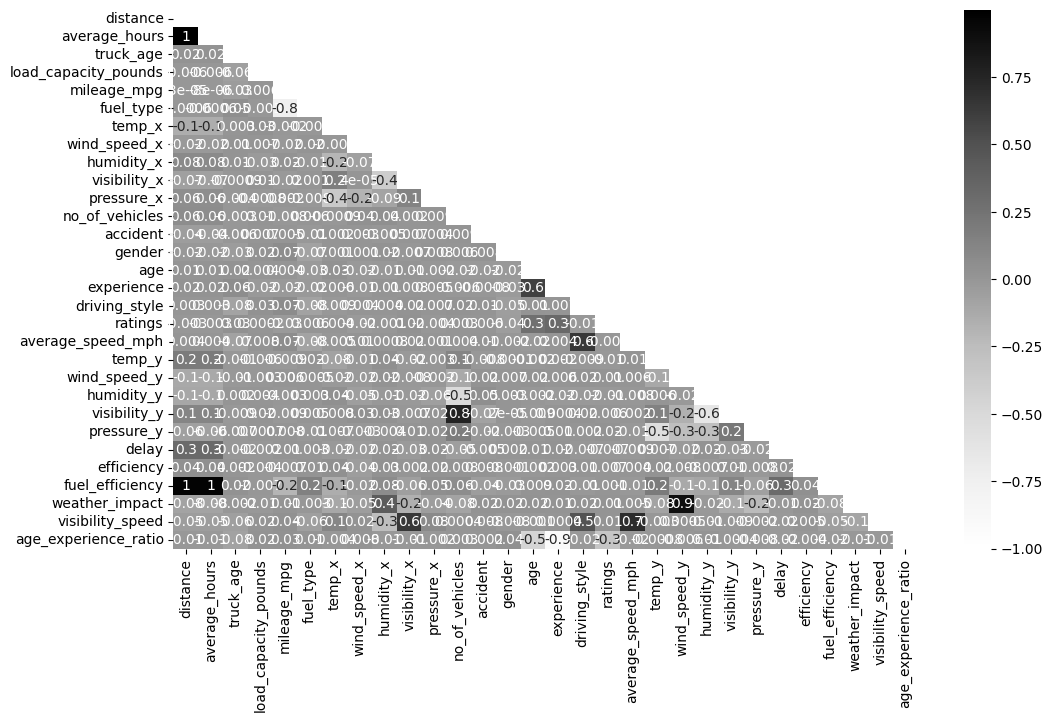

In [17]:
corr_cols_list = df.columns.to_list()
correl = df[corr_cols_list].corr(method='spearman')
mask = np.zeros_like(correl )

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots( figsize=(12,7) )
sns.heatmap(correl, mask=mask, vmin=-1, cmap='Greys', 
            annot=True, fmt='.1g')
plt.show()

In [18]:
corr_cols_list.remove("delay")
# corr_cols_list.extend(sa_cols_name)
corr_list = [] # to keep the correlations with price
for col in corr_cols_list:
    corr_list.append( round(df["delay"].corr(df[col]),4) )    

corr_list

c:\Users\rr010\OneDrive\Desktop\Class\Projects\TruckDelay_Classification\.venv\lib\site-packages\numpy\lib\function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


[0.2118,
 0.2118,
 0.0002,
 -0.0031,
 0.0092,
 0.0042,
 -0.0211,
 -0.0246,
 0.0212,
 -0.0192,
 0.0243,
 -0.0336,
 -0.0084,
 0.0019,
 0.005,
 0.0199,
 -0.0076,
 -0.0062,
 -0.0124,
 0.022,
 -0.0218,
 0.0272,
 -0.0135,
 -0.0263,
 0.0092,
 0.2046,
 -0.0119,
 -0.0215,
 nan]

In [19]:
df_corr = pd.DataFrame( data=zip(corr_cols_list, corr_list), 
                 columns=["col_name", "corr"] )\
            .sort_values("corr", ascending=False)\
            .reset_index(drop=True)
df_corr

,col_name,corr
0,distance,0.2118
1,average_hours,0.2118
2,fuel_efficiency,0.2046
3,humidity_y,0.0272
4,pressure_x,0.0243
5,temp_y,0.0220
6,humidity_x,0.0212
7,experience,0.0199
8,efficiency,0.0092
9,mileage_mpg,0.0092


In [19]:
spear_df_corr = pd.DataFrame( data=zip(corr_cols_list, corr_list), 
                 columns=["col_name", "corr"] )\
            .sort_values("corr", ascending=False)\
            .reset_index(drop=True)
spear_df_corr

,col_name,corr
0,distance,0.2001
1,average_hours,0.2001
2,precip_x,0.0321
3,temp_y,0.0228
4,humidity_x,0.0220
5,experience,0.0213
6,pressure_x,0.0211
7,humidity_y,0.0167
8,mileage_mpg,0.0114
9,age,0.0094


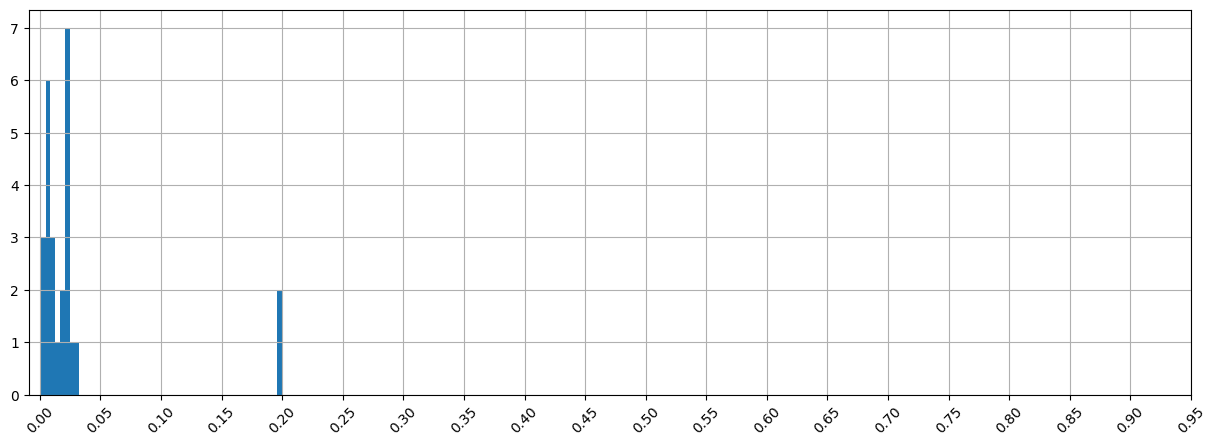

In [16]:
# Distribution of correlations with price 
fig, ax = plt.subplots(figsize=(15,5))
abs(df_corr["corr"]).hist(bins=50)
ax.set_xticks(np.arange(0, 1, 0.05))
plt.xticks(rotation=45)
plt.show()